In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('netflix.csv')

**Basic Data Exploration**

In [ ]:
data.head(2)  #shows top 2 records

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."


In [ ]:
data.tail(2)  #shows bottom 2 records

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."
8806,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...


In [ ]:
data.dtypes  #shows the datatypes of each column

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

In [ ]:
data.info()  #shows detail info from datatype to shape , to null count in dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [ ]:
data.describe()   #shows statistical info from the data set

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


**Exploratory data analysis**

In [ ]:
# check for duplicate values

data[data.duplicated()]  #here no duplicate records are found

# data.drop_duplicates()   #to remove the duplicates from the dataset

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description


In [ ]:
# check for null values
data.isnull().sum()   #shows column wise null value counts

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

<Axes: >

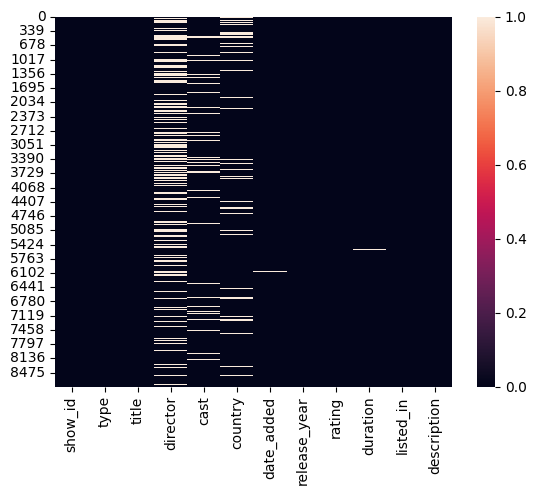

In [ ]:
# show null records using heatmap
sns.heatmap(data.isnull())

In [ ]:
#  Imputation
# treat null values column wise
data.director.fillna('No director',inplace=True)
data.cast.fillna('No cast' , inplace=True)
data.country.fillna('No country',inplace=True)
data.dropna(subset=['date_added','rating','duration'],inplace=True)


# data.director.fillna('No director',inplace=True)
# data.cast.fillna('No cast',inplace=True)
# data.country.fillna('No country',inplace=True)
# data.dropna(subset=['date_added','rating','duration'],inplace=True)

In [ ]:
data.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

**For House of Cards what is the Show id and who is the director of the show? **

In [ ]:
data.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,No cast,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,No director,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."


In [ ]:
# data[data['title'].str.lower().str.contains('house of cards')][['show_id','title','director']]

data[data['title'].str.lower().str.contains('house of cards')][['show_id','title','director']]

,show_id,title,director
1059,s1060,House of Cards,No director


**In which year highest number of the TV Show and Movies were released? Show with bar graph**

In [ ]:
data.head(1)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,No cast,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."


In [ ]:
# data['New_N'] = pd.to_datetime(data['date_added'])

data['New_N'] = pd.to_datetime(data['date_added'])

In [ ]:
data.head(1)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,New_N
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,No cast,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021-09-25


In [ ]:
# data['New_N'].dt.year.value_counts()
data['New_N'].dt.year.value_counts()

2019    2016
2020    1879
2018    1648
2021    1498
2017    1185
2016     426
2015      82
2014      24
2011      13
2013      11
2012       3
2009       2
2008       2
2010       1
Name: New_N, dtype: int64

In [ ]:
# Assuming 'New_N' is the column in your DataFrame
# df = data.groupby(data['New_N'].dt.year)['New_N'].count()
# df = df.sort_values(ascending=False)
# df

<Axes: >

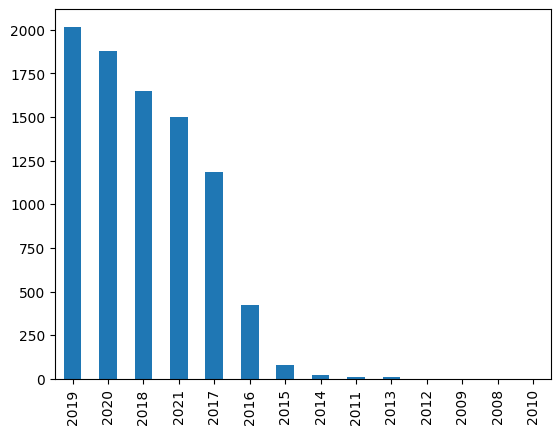

In [ ]:
data['New_N'].dt.year.value_counts().plot(kind='bar')
# data['date_n'].dt.year.value_counts().plot(kind= 'bar')

**How many Tv shows and Movies are there in the dataset**

In [ ]:
data.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,New_N
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,No cast,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021-09-25
1,s2,TV Show,Blood & Water,No director,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021-09-24


In [ ]:
df = data.groupby('type')[['type']].count().rename(columns={'type':'Count'}).reset_index()

df

,type,Count
0,Movie,6126
1,TV Show,2664


<Axes: xlabel='type', ylabel='count'>

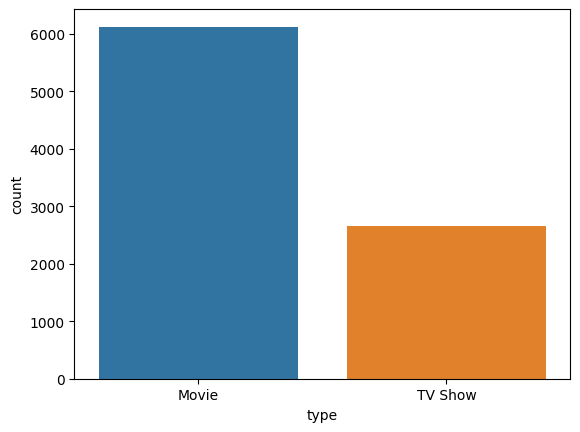

In [ ]:
sns.countplot(data=data,
              x='type')

**Show all the Movies that were released in year 2000**

In [ ]:
data.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,New_N
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,No cast,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021-09-25
1,s2,TV Show,Blood & Water,No director,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021-09-24


In [ ]:
data['Year'] = data['New_N'].dt.year
data.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,New_N,Year
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,No cast,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021-09-25,2021
1,s2,TV Show,Blood & Water,No director,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021-09-24,2021


In [ ]:
df2 = data.query("type=='Movie' & Year==2020")

df2

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,New_N,Year
1470,s1471,Movie,Alaska Is a Drag,Shaz Bennett,"Martin L. Washington Jr., Maya Washington, Mat...",United States,"December 31, 2020",2017,TV-MA,83 min,"Dramas, LGBTQ Movies","Tormented by bullies, an aspiring drag star wo...",2020-12-31,2020
1471,s1472,Movie,Best of Stand-Up 2020,No director,"Jerry Seinfeld, Leslie Jones, Taylor Tomlinson...",No country,"December 31, 2020",2020,TV-MA,77 min,Stand-Up Comedy,"From Jerry Seinfeld to Leslie Jones, Kevin Har...",2020-12-31,2020
1472,s1473,Movie,Bobby Jasoos,Samar Shaikh,"Vidya Balan, Ali Fazal, Supriya Pathak, Tanvi ...",India,"December 31, 2020",2014,TV-14,116 min,"Comedies, Dramas, International Movies",With unlimited determination and zero field ex...,2020-12-31,2020
1474,s1475,Movie,Tarung Sarung,Archie Hekagery,"Panji Zoni, Yayan Ruhian, Maizura, Cemal Faruk...",Indonesia,"December 31, 2020",2020,TV-PG,116 min,"Action & Adventure, Dramas, Faith & Spirituality","Wealthy and spoiled, a young man finds somethi...",2020-12-31,2020
1475,s1476,Movie,Too Handsome to Handle,Sabrina Rochelle Kalangie,"Ari Irham, Nikita Willy, Calvin Jeremy, Rachel...",Indonesia,"December 31, 2020",2019,TV-14,106 min,"Comedies, Dramas, International Movies",Wary of the effects of his good looks on other...,2020-12-31,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8742,s8743,Movie,Wild Wild West,Barry Sonnenfeld,"Will Smith, Kevin Kline, Kenneth Branagh, Salm...",United States,"January 1, 2020",1999,PG-13,106 min,"Action & Adventure, Comedies, Sci-Fi & Fantasy","Armed with an ingenious arsenal, two top-notch...",2020-01-01,2020
8743,s8744,Movie,Wildlife,Paul Dano,"Carey Mulligan, Ed Oxenbould, Bill Camp, Jake ...",United States,"September 1, 2020",2018,PG-13,105 min,"Dramas, Independent Movies",A teen’s life in 1960 Montana grows complicate...,2020-09-01,2020
8745,s8746,Movie,Willy Wonka & the Chocolate Factory,Mel Stuart,"Gene Wilder, Jack Albertson, Peter Ostrum, Roy...","United States, East Germany, West Germany","January 1, 2020",1971,G,100 min,"Children & Family Movies, Classic Movies, Come...",Zany Willy Wonka causes a stir when he announc...,2020-01-01,2020
8764,s8765,Movie,Wyatt Earp,Lawrence Kasdan,"Kevin Costner, Dennis Quaid, Gene Hackman, Dav...",United States,"January 1, 2020",1994,PG-13,191 min,Action & Adventure,Legendary lawman Wyatt Earp is continually at ...,2020-01-01,2020


**Show all the titles of all TV shows that were released in India only**

In [ ]:
df3 = data.query("type=='TV Show' and country == 'India'" )
df3

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,New_N,Year
4,s5,TV Show,Kota Factory,No director,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021-09-24,2021
39,s40,TV Show,Chhota Bheem,No director,"Vatsal Dubey, Julie Tejwani, Rupa Bhimani, Jig...",India,"September 16, 2021",2021,TV-Y7,3 Seasons,Kids' TV,"A brave, energetic little boy with superhuman ...",2021-09-16,2021
50,s51,TV Show,Dharmakshetra,No director,"Kashmira Irani, Chandan Anand, Dinesh Mehta, A...",India,"September 15, 2021",2014,TV-PG,1 Season,"International TV Shows, TV Dramas, TV Sci-Fi &...","After the ancient Great War, the god Chitragup...",2021-09-15,2021
66,s67,TV Show,Raja Rasoi Aur Anya Kahaniyan,No director,No cast,India,"September 15, 2021",2014,TV-G,1 Season,"Docuseries, International TV Shows",Explore the history and flavors of regional In...,2021-09-15,2021
69,s70,TV Show,Stories by Rabindranath Tagore,No director,No cast,India,"September 15, 2021",2015,TV-PG,1 Season,"International TV Shows, TV Dramas",The writings of Nobel Prize winner Rabindranat...,2021-09-15,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8173,s8174,TV Show,Thackeray,No director,No cast,India,"May 25, 2019",2019,TV-MA,1 Season,TV Shows,From controversial cartoonist to powerful Mumb...,2019-05-25,2019
8235,s8236,TV Show,The Calling,Bumpy,No cast,India,"April 1, 2019",2018,TV-MA,1 Season,"International TV Shows, Reality TV",Food-crazed travel junkies journey across Indi...,2019-04-01,2019
8321,s8322,TV Show,The Golden Years with Javed Akhtar,No director,No cast,India,"June 1, 2017",2016,TV-G,1 Season,"Docuseries, International TV Shows","Writer, poet and lyricist Javed Akhtar hosts t...",2017-06-01,2017
8349,s8350,TV Show,The House That Made Me,No director,Vinay Pathak,India,"March 31, 2017",2015,TV-PG,3 Seasons,"International TV Shows, Reality TV","With host Vinay Pathak, Indian celebrities ret...",2017-03-31,2017


**Show top 10 directors, who gave highest number of TV shows and movies on Netflix**

In [ ]:
df4 = data.groupby('director')[['director']].count().rename(columns={'director':'Count'}).reset_index()
df4.sort_values(by='Count', ascending=False)

,director,Count
3049,No director,2621
3391,Rajiv Chilaka,19
3442,"Raúl Campos, Jan Suter",18
2596,Marcus Raboy,16
4045,Suhas Kadav,16
...,...,...
2049,Jose Gomez,1
2050,Jose Javier Reyes,1
541,Billy Bob Thornton,1
2052,"Joseduardo Giordano, Sergio Goyri Jr.",1


In [ ]:
data['director'].value_counts()

No director                       2621
Rajiv Chilaka                       19
Raúl Campos, Jan Suter              18
Suhas Kadav                         16
Marcus Raboy                        16
                                  ... 
Raymie Muzquiz, Stu Livingston       1
Joe Menendez                         1
Eric Bross                           1
Will Eisenberg                       1
Mozez Singh                          1
Name: director, Length: 4527, dtype: int64

**Show all the records where 'category' is Movie and 'type' is comedies or 'country' is United Kingdom**

In [ ]:
data.head(1)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,New_N,Year
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,No cast,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021-09-25,2021


In [ ]:
df5 = data.query("type=='Movie' & listed_in=='Comedies' |country=='United Kingdom'")
#df5

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,New_N,Year
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...,2021-09-24,2021
27,s28,Movie,Grown Ups,Dennis Dugan,"Adam Sandler, Kevin James, Chris Rock, David S...",United States,"September 20, 2021",2010,PG-13,103 min,Comedies,Mourning the loss of their beloved junior high...,2021-09-20,2021
32,s33,TV Show,Sex Education,No director,"Asa Butterfield, Gillian Anderson, Ncuti Gatwa...",United Kingdom,"September 17, 2021",2020,TV-MA,3 Seasons,"British TV Shows, International TV Shows, TV C...",Insecure Otis has all the answers when it come...,2021-09-17,2021
65,s66,TV Show,Numberblocks,No director,"Beth Chalmers, David Holt, Marcel McCalla, Ter...",United Kingdom,"September 15, 2021",2021,TV-Y,6 Seasons,Kids' TV,"In a place called Numberland, math adds up to ...",2021-09-15,2021
72,s73,TV Show,Jack Whitehall: Travels with My Father,No director,"Jack Whitehall, Michael Whitehall",United Kingdom,"September 14, 2021",2021,TV-MA,5 Seasons,"British TV Shows, Docuseries, International TV...",Jovial comic Jack Whitehall invites his stuffy...,2021-09-14,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8740,s8741,TV Show,Wild Alaska,No director,Dougray Scott,United Kingdom,"March 31, 2017",2015,TV-PG,1 Season,"British TV Shows, Docuseries, Science & Nature TV",The natural bounty of Alaska sustains its dive...,2017-03-31,2017
8741,s8742,TV Show,Wild Arabia,No director,Alexander Siddig,United Kingdom,"March 31, 2017",2013,TV-PG,1 Season,"British TV Shows, Docuseries, Science & Nature TV",The widely varied geology and dramatic landsca...,2017-03-31,2017
8744,s8745,Movie,Williams,Morgan Matthews,No cast,United Kingdom,"November 4, 2017",2017,TV-MA,105 min,"Documentaries, International Movies, Sports Mo...",This inspiring documentary charts the birth of...,2017-11-04,2017
8758,s8759,TV Show,World's Busiest Cities,No director,"Anita Rani, Ade Adepitan, Dan Snow",United Kingdom,"February 1, 2019",2017,TV-PG,1 Season,"British TV Shows, Docuseries","From Moscow to Mexico City, three BBC journali...",2019-02-01,2019


In [ ]:
data[(data['type']=='Movie') & (data['listed_in']=='Comedies') | (data['country']=='United Kingdom')]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,New_N,Year
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...,2021-09-24,2021
27,s28,Movie,Grown Ups,Dennis Dugan,"Adam Sandler, Kevin James, Chris Rock, David S...",United States,"September 20, 2021",2010,PG-13,103 min,Comedies,Mourning the loss of their beloved junior high...,2021-09-20,2021
32,s33,TV Show,Sex Education,No director,"Asa Butterfield, Gillian Anderson, Ncuti Gatwa...",United Kingdom,"September 17, 2021",2020,TV-MA,3 Seasons,"British TV Shows, International TV Shows, TV C...",Insecure Otis has all the answers when it come...,2021-09-17,2021
65,s66,TV Show,Numberblocks,No director,"Beth Chalmers, David Holt, Marcel McCalla, Ter...",United Kingdom,"September 15, 2021",2021,TV-Y,6 Seasons,Kids' TV,"In a place called Numberland, math adds up to ...",2021-09-15,2021
72,s73,TV Show,Jack Whitehall: Travels with My Father,No director,"Jack Whitehall, Michael Whitehall",United Kingdom,"September 14, 2021",2021,TV-MA,5 Seasons,"British TV Shows, Docuseries, International TV...",Jovial comic Jack Whitehall invites his stuffy...,2021-09-14,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8740,s8741,TV Show,Wild Alaska,No director,Dougray Scott,United Kingdom,"March 31, 2017",2015,TV-PG,1 Season,"British TV Shows, Docuseries, Science & Nature TV",The natural bounty of Alaska sustains its dive...,2017-03-31,2017
8741,s8742,TV Show,Wild Arabia,No director,Alexander Siddig,United Kingdom,"March 31, 2017",2013,TV-PG,1 Season,"British TV Shows, Docuseries, Science & Nature TV",The widely varied geology and dramatic landsca...,2017-03-31,2017
8744,s8745,Movie,Williams,Morgan Matthews,No cast,United Kingdom,"November 4, 2017",2017,TV-MA,105 min,"Documentaries, International Movies, Sports Mo...",This inspiring documentary charts the birth of...,2017-11-04,2017
8758,s8759,TV Show,World's Busiest Cities,No director,"Anita Rani, Ade Adepitan, Dan Snow",United Kingdom,"February 1, 2019",2017,TV-PG,1 Season,"British TV Shows, Docuseries","From Moscow to Mexico City, three BBC journali...",2019-02-01,2019


**In how many movies/shows Tom Cruise was cast**

In [ ]:
data.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,New_N,Year
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,No cast,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021-09-25,2021
1,s2,TV Show,Blood & Water,No director,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021-09-24,2021


In [ ]:
data[data['cast'].str.lower().str.contains('tom cruise')]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,New_N,Year
341,s342,Movie,Magnolia,Paul Thomas Anderson,"John C. Reilly, Philip Baker Hall, Tom Cruise,...",United States,"August 1, 2021",1999,R,189 min,"Dramas, Independent Movies","Through chance, history and divine interventio...",2021-08-01,2021
1254,s1255,Movie,Rain Man,Barry Levinson,"Dustin Hoffman, Tom Cruise, Valeria Golino, Ge...",United States,"March 1, 2021",1988,R,134 min,"Classic Movies, Dramas","Motivated by money, a selfish workaholic seeki...",2021-03-01,2021


**What are the different rating defined by Netflix**

In [ ]:
data['rating'].unique()

array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', 'NR', 'TV-Y7-FV', 'UR'], dtype=object)

In [ ]:
data['rating'].nunique()

14

**How many Movies got the TV-14 rating in Canada**

In [ ]:
data.head(1 )

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,New_N,Year
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,No cast,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021-09-25,2021


In [ ]:
df6 = data.query("type=='Movie' & rating=='TV-14' & country=='Canada'")
df6.shape

(13, 14)

**How many TV show got the R rating after year 2018**

In [ ]:
df7 = data.query("type=='TV Show' & rating == 'R' & Year > 2018")
df7

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,New_N,Year
3893,s3894,TV Show,The Hateful Eight: Extended Version,Quentin Tarantino,"Samuel L. Jackson, Kurt Russell, Jennifer Jaso...",No country,"April 25, 2019",2015,R,1 Season,TV Shows,Trapped at a stagecoach stop as a storm rages ...,2019-04-25,2019


**What is the max duration of TV show in Netflix?**

In [ ]:
data.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,New_N,Year
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,No cast,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021-09-25,2021
1,s2,TV Show,Blood & Water,No director,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021-09-24,2021


In [ ]:
data['duration'].unique()

array(['90 min', '2 Seasons', '1 Season', '91 min', '125 min',
       '9 Seasons', '104 min', '127 min', '4 Seasons', '67 min', '94 min',
       '5 Seasons', '161 min', '61 min', '166 min', '147 min', '103 min',
       '97 min', '106 min', '111 min', '3 Seasons', '110 min', '105 min',
       '96 min', '124 min', '116 min', '98 min', '23 min', '115 min',
       '122 min', '99 min', '88 min', '100 min', '6 Seasons', '102 min',
       '93 min', '95 min', '85 min', '83 min', '113 min', '13 min',
       '182 min', '48 min', '145 min', '87 min', '92 min', '80 min',
       '117 min', '128 min', '119 min', '143 min', '114 min', '118 min',
       '108 min', '63 min', '121 min', '142 min', '154 min', '120 min',
       '82 min', '109 min', '101 min', '86 min', '229 min', '76 min',
       '89 min', '156 min', '112 min', '107 min', '129 min', '135 min',
       '136 min', '165 min', '150 min', '133 min', '70 min', '84 min',
       '140 min', '78 min', '7 Seasons', '64 min', '59 min', '139 min',
    

In [ ]:
data.duration.dtypes   #convert the dtype from object to integer

dtype('O')

In [ ]:
# create a new column
data[['Minutes','Unit']] = data['duration'].str.split(' ',expand=True)

In [ ]:
data.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,New_N,Year,Minute,Unit,Minutes
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,No cast,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021-09-25,2021,90,min,90
1,s2,TV Show,Blood & Water,No director,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021-09-24,2021,2,Seasons,2


In [ ]:
data['Minute'].max()

'99'

**Which Individual country has the highest no of TV shows?**

In [ ]:
data.head(1)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,New_N,Year,Minute,Unit,Minutes
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,No cast,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021-09-25,2021,90,min,90


In [ ]:
df9 = data.query("type=='TV Show'")[['country']]

In [ ]:
df9.head(2)

In [ ]:
df8 = df9.groupby('country')[['country',]].count().rename(columns={'country':'Count'}).reset_index()
df8.sort_values(by='Count',ascending=False)

,country,Count
161,United States,754
102,No country,390
141,United Kingdom,212
83,Japan,167
121,South Korea,158
...,...,...
77,"Italy, Canada, France",1
78,"Italy, Germany",1
79,"Italy, South Africa, West Germany, Australia, ...",1
80,"Italy, United Kingdom",1
